In [120]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
orders = pd.read_excel("OrderList.xlsx")
# orders.set_index(orders['The list of orders. Each order comprises at most five items.'],inplace=True)
# orders.columns = orders.iloc[5]
orders.reset_index(inplace=True)
# orders = orders[6:]
# orders = orders.iloc[:,-6:]
orders.set_index(orders['Order No.'],inplace=True)
orders = orders.drop('Order No.',axis=1)
orders.reset_index(inplace=True)
orders = orders.drop(['Order No.','index'],axis=1)
orders

,Position 1,Position 2,Position 3,Position 4,Position 5
0,50,30,0,0,0
1,49,18,76,0,0
2,72,52,51,41,35
3,50,4,0,0,0
4,76,19,26,80,6
...,...,...,...,...,...
1995,60,46,35,0,0
1996,8,43,70,77,31
1997,46,0,0,0,0
1998,90,23,64,35,0


In [122]:
total_items = []
for order_list in orders.values:
    for item in order_list:
        total_items.append(item)
total_items

[50,
 30,
 0,
 0,
 0,
 49,
 18,
 76,
 0,
 0,
 72,
 52,
 51,
 41,
 35,
 50,
 4,
 0,
 0,
 0,
 76,
 19,
 26,
 80,
 6,
 66,
 67,
 51,
 84,
 71,
 39,
 18,
 29,
 83,
 49,
 88,
 2,
 0,
 0,
 0,
 63,
 19,
 0,
 0,
 0,
 28,
 11,
 77,
 8,
 31,
 32,
 78,
 38,
 31,
 44,
 63,
 31,
 10,
 68,
 30,
 88,
 70,
 35,
 2,
 0,
 71,
 70,
 77,
 34,
 78,
 38,
 8,
 15,
 90,
 0,
 6,
 22,
 63,
 0,
 0,
 29,
 2,
 38,
 0,
 0,
 15,
 59,
 0,
 0,
 0,
 8,
 39,
 51,
 34,
 89,
 75,
 31,
 48,
 70,
 71,
 10,
 71,
 0,
 0,
 0,
 74,
 15,
 0,
 0,
 0,
 44,
 15,
 0,
 0,
 0,
 51,
 0,
 0,
 0,
 0,
 19,
 65,
 50,
 67,
 0,
 48,
 5,
 88,
 71,
 67,
 30,
 39,
 6,
 31,
 0,
 13,
 0,
 0,
 0,
 0,
 58,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 63,
 48,
 0,
 0,
 0,
 18,
 15,
 70,
 2,
 0,
 64,
 6,
 0,
 0,
 0,
 83,
 82,
 18,
 35,
 38,
 63,
 79,
 8,
 0,
 0,
 58,
 55,
 44,
 72,
 47,
 28,
 0,
 0,
 0,
 0,
 49,
 16,
 55,
 10,
 0,
 76,
 65,
 2,
 0,
 0,
 70,
 51,
 9,
 76,
 13,
 71,
 28,
 10,
 15,
 11,
 74,
 83,
 76,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 26,
 83,
 35,

In [123]:
from collections import Counter
count = dict(Counter(total_items))
del count[0]
sorted_count = dict(sorted(count.items(),key=lambda item: item[1], reverse=True))
sorted_count

{34: 274,
 31: 252,
 35: 246,
 71: 237,
 70: 207,
 15: 192,
 18: 191,
 30: 182,
 51: 178,
 76: 175,
 2: 173,
 58: 159,
 67: 153,
 6: 150,
 50: 131,
 49: 126,
 4: 122,
 83: 122,
 11: 122,
 28: 117,
 10: 110,
 38: 102,
 48: 100,
 33: 100,
 52: 99,
 78: 96,
 60: 95,
 43: 91,
 8: 88,
 55: 86,
 19: 80,
 1: 80,
 63: 79,
 39: 67,
 44: 67,
 59: 67,
 13: 65,
 57: 65,
 47: 64,
 66: 62,
 72: 59,
 37: 57,
 64: 56,
 46: 56,
 20: 56,
 84: 55,
 74: 53,
 65: 52,
 32: 51,
 77: 48,
 68: 48,
 90: 47,
 89: 47,
 79: 46,
 69: 46,
 16: 45,
 82: 44,
 29: 43,
 21: 42,
 45: 40,
 87: 36,
 22: 35,
 88: 32,
 27: 32,
 24: 27,
 5: 24,
 14: 22,
 80: 21,
 54: 21,
 23: 21,
 36: 21,
 75: 18,
 9: 18,
 56: 18,
 53: 17,
 61: 16,
 25: 14,
 12: 14,
 26: 12,
 40: 11,
 62: 10,
 41: 8,
 3: 8,
 86: 8,
 73: 6,
 85: 4,
 7: 2,
 42: 1,
 17: 1,
 81: 1}

In [124]:
bin_df = pd.DataFrame.from_dict(sorted_count, orient='index').reset_index()
bin_df.columns = ['Product','Occurance']
bin_df['cum_sum'] = bin_df['Occurance'].cumsum()
bin_df['cum_sum_perc'] = bin_df['Occurance'].cumsum() / bin_df['Occurance'].sum()
bin_df.head()

,Product,Occurance,cum_sum,cum_sum_perc
0,34,274,274,0.041253
1,31,252,526,0.079193
2,35,246,772,0.116230
3,71,237,1009,0.151912
4,70,207,1216,0.183077


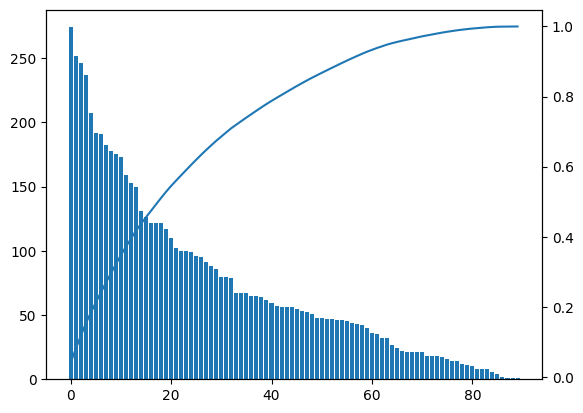

In [125]:
fig, ax1 = plt.subplots()
ax1.bar(bin_df.index,height=bin_df['Occurance'])
ax2 = ax1.twinx()
ax2.plot(bin_df.index,bin_df['cum_sum_perc'])
plt.show()

In [126]:
# # plt.bar(sorted_count.keys(),sorted_count.values())
# x = sorted_count.keys()
# y = sorted_count.values()

# keys = [item[0] for item in sorted_count]
# values = [item[1] for item in sorted_count]

# #plt.bar(keys,values)
# keys


In [127]:
distances = pd.read_excel("DistanceMatrix.xlsx")
distances.columns = distances.iloc[1]
distances = distances[2:]
# distances.set_index('NaN',inplace=True)
# distances[['Packaging']]
# distances.iloc[-1,:]
dist_from_pack = distances.iloc[-1]
distance_df = pd.DataFrame(dist_from_pack).reset_index()
distance_df.columns = ['Shelve','Distance']
distance_df = distance_df[1:]
distance_df = distance_df[:-1]
distance_df = distance_df.sort_values(by="Distance",ascending=True)
distance_df.reset_index(inplace=True)
distance_df.head(26)

,index,Shelve,Distance
0,1,1.0,2.0
1,25,25.0,2.0
2,49,49.0,3.0
3,26,26.0,3.0
4,73,73.0,3.0
5,2,2.0,3.0
6,74,74.0,4.0
7,27,27.0,4.0
8,3,3.0,4.0
9,50,50.0,4.0


In [128]:
new_allocation = distance_df.merge(bin_df,left_index=True, right_index=True)[['Shelve','Product']]
# new_allocation.sort_values(by='Shelve',inplace=True)
new_allocation.head(25)

,Shelve,Product
0,1.0,34
1,25.0,31
2,49.0,35
3,26.0,71
4,73.0,70
5,2.0,15
6,74.0,18
7,27.0,30
8,3.0,51
9,50.0,76


In [129]:
import shorthest_path as sp
import importlib
importlib.reload(sp); 

In [130]:
# Load in the data file of orders
orders = pd.read_excel('OrderList.xlsx', sheet_name = "Orders")

# Drop the order numbers
orders = orders.drop(columns = "Order No.")

# Display a snippet of the data frame
orders

,Position 1,Position 2,Position 3,Position 4,Position 5
0,50,30,0,0,0
1,49,18,76,0,0
2,72,52,51,41,35
3,50,4,0,0,0
4,76,19,26,80,6
...,...,...,...,...,...
1995,60,46,35,0,0
1996,8,43,70,77,31
1997,46,0,0,0,0
1998,90,23,64,35,0


In [131]:
print(type(orders))

<class 'pandas.core.frame.DataFrame'>


In [132]:
equivalent_values_dict = new_allocation.set_index('Product')['Shelve'].to_dict()
equivalent_values_dict

{34: 1.0,
 31: 25.0,
 35: 49.0,
 71: 26.0,
 70: 73.0,
 15: 2.0,
 18: 74.0,
 30: 27.0,
 51: 3.0,
 76: 50.0,
 2: 75.0,
 58: 28.0,
 67: 4.0,
 6: 51.0,
 50: 5.0,
 49: 29.0,
 4: 76.0,
 83: 52.0,
 11: 30.0,
 28: 6.0,
 10: 77.0,
 38: 53.0,
 48: 54.0,
 33: 7.0,
 52: 78.0,
 78: 31.0,
 60: 55.0,
 43: 79.0,
 8: 8.0,
 55: 32.0,
 19: 80.0,
 1: 33.0,
 63: 9.0,
 39: 56.0,
 44: 34.0,
 59: 57.0,
 13: 81.0,
 57: 10.0,
 47: 58.0,
 66: 82.0,
 72: 35.0,
 37: 11.0,
 64: 59.0,
 46: 12.0,
 20: 36.0,
 84: 83.0,
 74: 60.0,
 65: 37.0,
 32: 84.0,
 77: 13.0,
 68: 61.0,
 90: 38.0,
 89: 14.0,
 79: 85.0,
 69: 62.0,
 16: 39.0,
 82: 15.0,
 29: 86.0,
 21: 63.0,
 45: 16.0,
 87: 87.0,
 22: 40.0,
 88: 17.0,
 27: 88.0,
 24: 64.0,
 5: 41.0,
 14: 18.0,
 80: 65.0,
 54: 89.0,
 23: 42.0,
 36: 90.0,
 75: 19.0,
 9: 43.0,
 56: 66.0,
 53: 91.0,
 61: 20.0,
 25: 44.0,
 12: 67.0,
 26: 92.0,
 40: 68.0,
 62: 21.0,
 41: 45.0,
 3: 93.0,
 86: 46.0,
 73: 22.0,
 85: 69.0,
 7: 47.0,
 42: 94.0,
 17: 23.0,
 81: 70.0}

In [133]:
positions = ['Position 1','Position 2','Position 3','Position 4','Position 5']
for col in positions:
    orders[col] = orders[col].map(equivalent_values_dict)
    orders[col] = orders[col].astype('Int64')
orders = orders.fillna(0)
orders.head(25)
# orders.to_excel("orders_2.xlsx")

,Position 1,Position 2,Position 3,Position 4,Position 5
0,5,27,0,0,0
1,29,74,50,0,0
2,35,78,3,45,49
3,5,76,0,0,0
4,50,80,92,65,51
5,82,4,3,83,26
6,56,74,86,52,29
7,17,75,0,0,0
8,9,80,0,0,0
9,6,30,13,8,25


In [134]:
import shorthest_path as sp

In [136]:
orders.iloc[0]

Position 1     5
Position 2    27
Position 3     0
Position 4     0
Position 5     0
Name: 0, dtype: Int64

In [142]:
sp.shortest_path(orders.iloc[4].values.tolist())

SystemError: <built-in function Sum> returned a result with an exception set